In [40]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [41]:
# Read the spotify data in from data.csv
url = 'https://media.githubusercontent.com/media/jossharlequin/spotify-popularity-project/main/Resources/data.csv'
df = pd.read_csv(url)
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [42]:
# Drop unused columns
spotify_df = df.drop(columns=['artists', 'name', 'id', 'release_date', 'year'])
spotify_df['seconds'] = spotify_df['duration_ms']/1000
# spotify_df.info()
spotify_df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,seconds
0,0.995,0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,0,0.0506,118.469,0.7790,158.648
1,0.994,0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,0,0.0462,83.972,0.0767,282.133
2,0.604,0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,0,0.9290,107.177,0.8800,104.300
3,0.995,0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,0,0.0926,108.003,0.7200,180.760
4,0.990,0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,1,0.0424,62.149,0.0693,687.733


In [53]:
# Binning the target variable into groups of 5 for improved model accuracy 
bins = [-1,20,40,60,80,100]
labels = (0,2,4,6,8)
spotify_df['popularity'] = pd.cut(spotify_df['popularity'], bins=bins, labels=labels)

column_names = spotify_df.columns.tolist()
print("Column names:", column_names)

Column names: ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'valence', 'seconds']


In [44]:
# Setting popularity as the target variable and setting the remaining columns as features
y = spotify_df.popularity.values
X = spotify_df.drop(columns='popularity').values

# Splitting training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [45]:
# Scaling the data using StandarScaler as a preprocessing step for the neural network
scaler = StandardScaler()

# Fitting the StandardScaler
X_scaler = scaler.fit(X_train)

# Scaling the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [46]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model = rf_model.fit(X_train_scaled, y_train)

In [47]:
# Making predictions using the testing data
import numpy as np
predictions = rf_model.predict(X_test_scaled)

# Rounding predictions into the bins used previously to allow for proper model evaluation
rounded_predictions = np.round(predictions)

# Mapping the rounded predictions to the corresponding labels
mapped_predictions = np.array([0, 2, 4, 6, 8])[np.searchsorted([0, 2, 4, 6, 8], rounded_predictions)]

In [48]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, mapped_predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 2", "Actual 4", "Actual 6", "Actual 8"], columns=["Predicted 0", "Predicted 2", "Predicted 4", "Predicted 6", "Predicted 8"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, mapped_predictions)

In [49]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score: {acc_score}")
print("Classification Report")
print(classification_report(y_test, mapped_predictions))

Confusion Matrix


,Predicted 0,Predicted 2,Predicted 4,Predicted 6,Predicted 8
Actual 0,5926,6621,676,36,0
Actual 2,274,5849,6642,123,0
Actual 4,85,2521,8606,1225,1
Actual 6,8,351,2066,1345,4
Actual 8,0,8,42,66,3


Accuracy Score: 0.5115353830217996
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.45      0.61     13259
           2       0.38      0.45      0.41     12888
           4       0.48      0.69      0.56     12438
           6       0.48      0.36      0.41      3774
           8       0.38      0.03      0.05       119

    accuracy                           0.51     42478
   macro avg       0.53      0.39      0.41     42478
weighted avg       0.59      0.51      0.52     42478



In [54]:
# Calculating feature importance
importances = rf_model.feature_importances_
# Sorting features by importance
feature_names = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'seconds']
sorted(zip(rf_model.feature_importances_, feature_names), reverse=True)

[(0.3574811828309204, 'acousticness'),
 (0.12733707876204126, 'loudness'),
 (0.07680543126322843, 'speechiness'),
 (0.06404193498477789, 'valence'),
 (0.05705384735947924, 'danceability'),
 (0.05117342048554479, 'energy'),
 (0.0479141660864885, 'liveness'),
 (0.047269569888461455, 'tempo'),
 (0.043221255914214024, 'instrumentalness'),
 (0.03950024296250892, 'seconds'),
 (0.03931786521006893, 'duration_ms'),
 (0.022659457902225018, 'explicit'),
 (0.021721680245507906, 'key'),
 (0.004502866104533361, 'mode')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

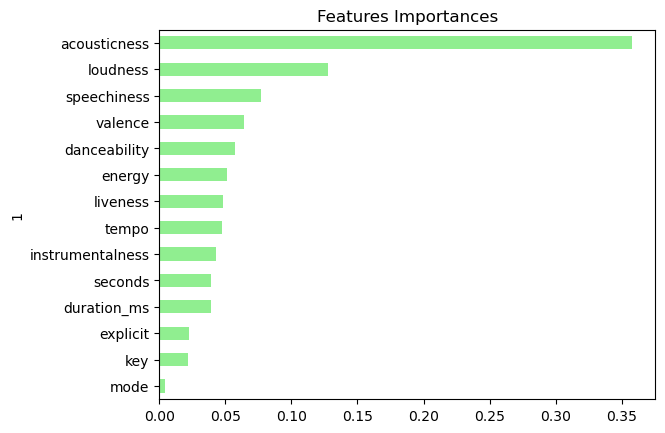

In [57]:
# Visualizing the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, feature_names), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: "Feature Importances"}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= "Features Importances", legend=False)